In [28]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#load the data matrics
matrix_1st = np.loadtxt('right1st.txt')
print('1 state scenario matrics has the shape:',matrix_1st.shape)

1 state scenario matrics has the shape: (1439, 7)


In [30]:
a = matrix_1st[np.where(matrix_1st[:,0]==4),:]

In [31]:
a

array([[[4., 0., 0., 4., 0., 0., 4.],
        [4., 0., 0., 4., 0., 1., 3.],
        [4., 0., 0., 4., 0., 2., 2.],
        [4., 0., 0., 4., 0., 3., 1.],
        [4., 0., 0., 4., 0., 4., 0.],
        [4., 0., 0., 4., 1., 3., 0.],
        [4., 0., 0., 4., 2., 2., 0.],
        [4., 0., 0., 4., 3., 1., 0.],
        [4., 0., 0., 4., 4., 0., 0.],
        [4., 0., 1., 3., 0., 0., 4.],
        [4., 0., 1., 3., 0., 1., 3.],
        [4., 0., 1., 3., 0., 2., 2.],
        [4., 0., 1., 3., 0., 3., 1.],
        [4., 0., 1., 3., 1., 3., 0.],
        [4., 0., 1., 3., 2., 2., 0.],
        [4., 0., 1., 3., 3., 1., 0.],
        [4., 0., 1., 3., 4., 0., 0.],
        [4., 1., 0., 3., 0., 0., 4.],
        [4., 1., 0., 3., 0., 1., 3.],
        [4., 1., 0., 3., 0., 2., 2.],
        [4., 1., 0., 3., 0., 3., 1.],
        [4., 1., 0., 3., 0., 4., 0.],
        [4., 1., 0., 3., 1., 3., 0.],
        [4., 1., 0., 3., 2., 2., 0.],
        [4., 1., 0., 3., 3., 1., 0.],
        [4., 1., 0., 3., 4., 0., 0.],
        [4.,

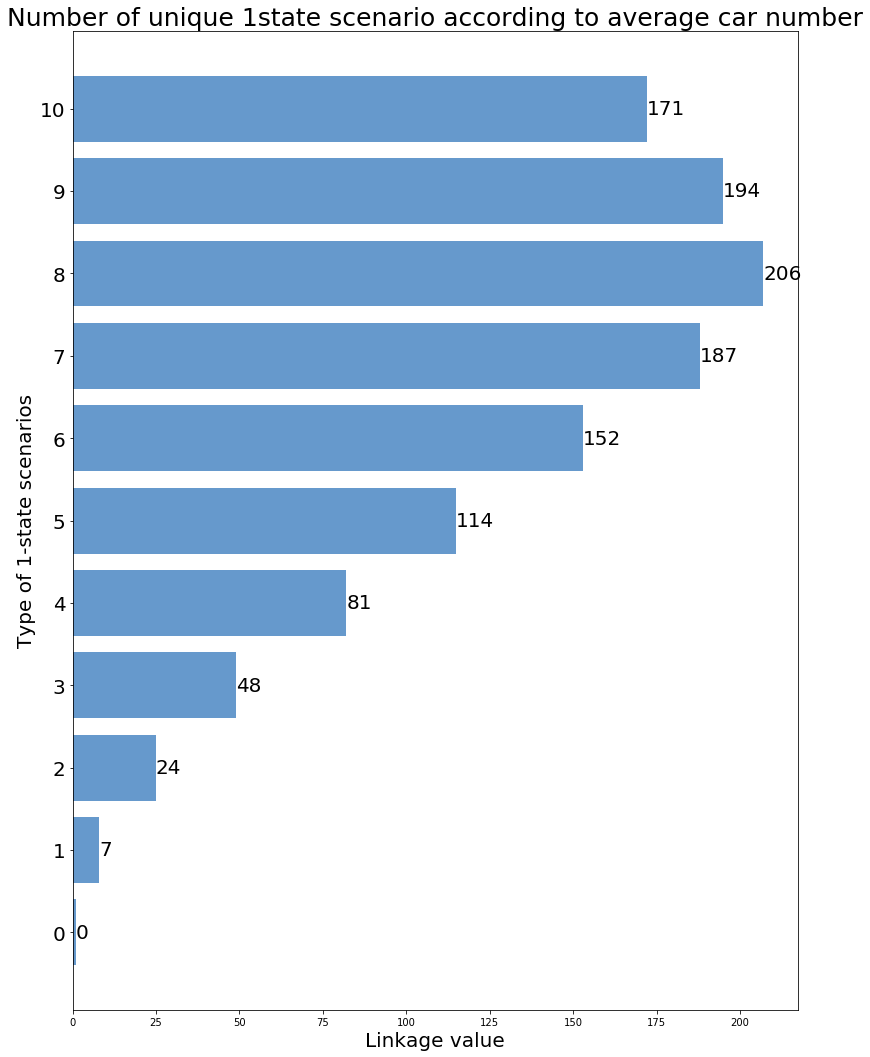

In [68]:
fig, ax = plt.subplots(figsize=(13,18))
value = []
for i in range(11):
    num = matrix_1st[np.where(matrix_1st[:,0]==i),:].shape[1]
    value.append(num)
f = ax.barh(range(11), value, color='#6699CC')
for rect in f:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w-1), ha='left', va='center', fontsize = 20)
ax.set_yticks(range(11))
ax.set_yticklabels(range(11),fontsize = 20)
ax.set_title("Number of unique 1state scenario according to average car number",fontsize = 25)
plt.ylabel('Type of 1-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
plt.show()

In [33]:
car1 = matrix_1st[np.where(matrix_1st[:,0]==1),:]
car1 = car1[:,1:]
car1 = np.squeeze(car1,axis= (0,))
str1 = ";".join(str(i) for i in car1)
str1 = str1.split(";")
str1

['[1. 0. 0. 1. 0. 1. 0.]',
 '[1. 0. 0. 1. 1. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1.]',
 '[1. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0.]']

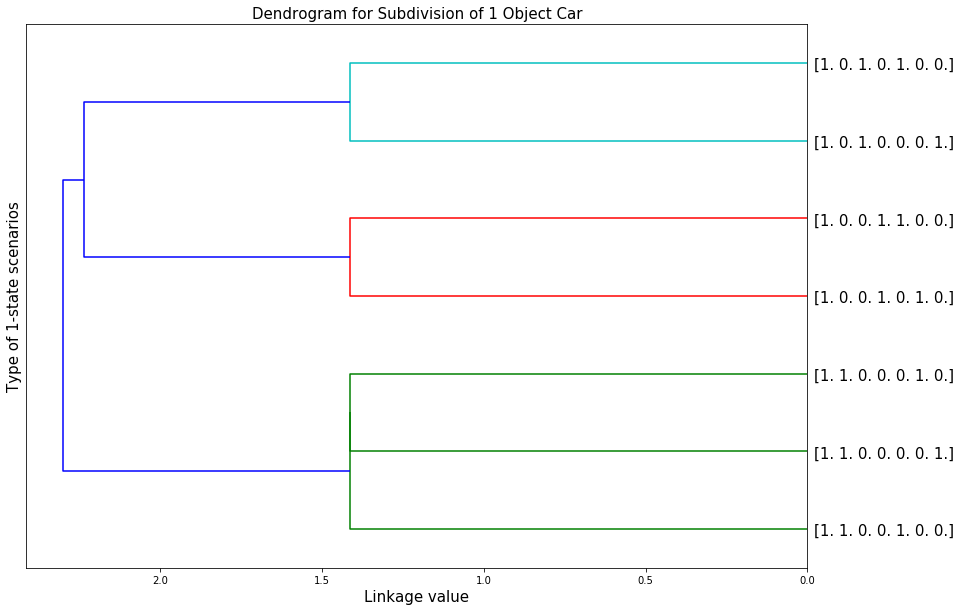

(6, 4)


In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car1, 'ward')
f = fcluster(Z,0.0001,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendrogram for Subdivision of 1 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str1,orientation='left', leaf_rotation=0,
              leaf_font_size=15)
plt.show()

print(Z.shape)

In [62]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram on 1-state scenario (truncated)',fontsize = 20)
        plt.xlabel('sample index',fontsize = 20)
        plt.ylabel('dissimilarity',fontsize = 20)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

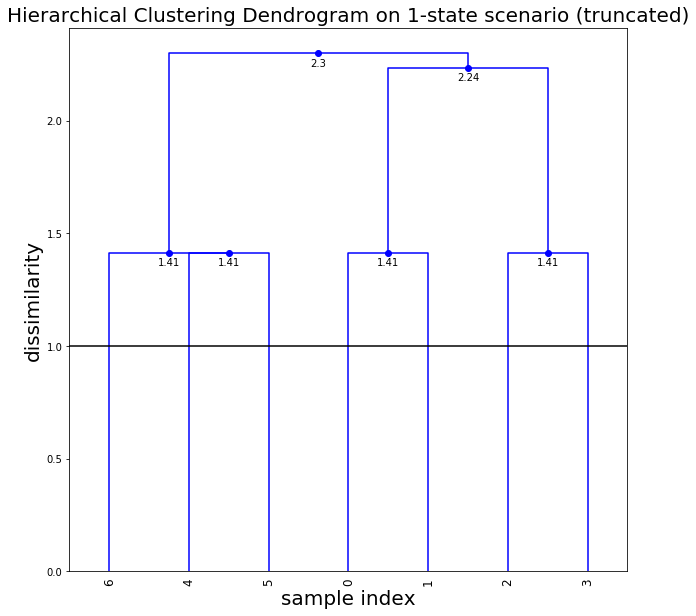

In [63]:
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
 #   orientation = 'left',
    show_contracted=True,
    annotate_above=1,
    max_d=1,
)
plt.show()

In [8]:
Z

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 2.        ,  3.        ,  1.41421356,  2.        ],
       [ 4.        ,  5.        ,  1.41421356,  2.        ],
       [ 6.        ,  9.        ,  1.41421356,  3.        ],
       [ 7.        ,  8.        ,  2.23606798,  4.        ],
       [10.        , 11.        ,  2.29906813,  7.        ]])

In [40]:
car2 = matrix_1st[np.where(matrix_1st[:,0]==2),:]
car2 = car2[:,1:]
car2 = np.squdef fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=13,
    max_d=13,
)
plt.show()eeze(car2,axis= (0,))
str2 = ";".join(str(i) for i in car2)
str2 = str2.split(";")
str2

['[2. 0. 0. 2. 0. 1. 1.]',
 '[2. 0. 0. 2. 0. 2. 0.]',
 '[2. 0. 0. 2. 1. 1. 0.]',
 '[2. 0. 0. 2. 2. 0. 0.]',
 '[2. 0. 1. 1. 0. 0. 2.]',
 '[2. 0. 1. 1. 0. 1. 1.]',
 '[2. 0. 1. 1. 2. 0. 0.]',
 '[2. 1. 0. 1. 0. 0. 2.]',
 '[2. 1. 0. 1. 0. 1. 1.]',
 '[2. 1. 0. 1. 0. 2. 0.]',
 '[2. 1. 0. 1. 1. 0. 1.]',
 '[2. 1. 0. 1. 1. 1. 0.]',
 '[2. 1. 0. 1. 2. 0. 0.]',
 '[2. 1. 1. 0. 0. 0. 2.]',
 '[2. 1. 1. 0. 0. 1. 1.]',
 '[2. 1. 1. 0. 1. 0. 1.]',
 '[2. 1. 1. 0. 1. 1. 0.]',
 '[2. 1. 1. 0. 2. 0. 0.]',
 '[2. 2. 0. 0. 0. 0. 2.]',
 '[2. 2. 0. 0. 0. 1. 1.]',
 '[2. 2. 0. 0. 0. 2. 0.]',
 '[2. 2. 0. 0. 1. 0. 1.]',
 '[2. 2. 0. 0. 1. 1. 0.]',
 '[2. 2. 0. 0. 2. 0. 0.]']

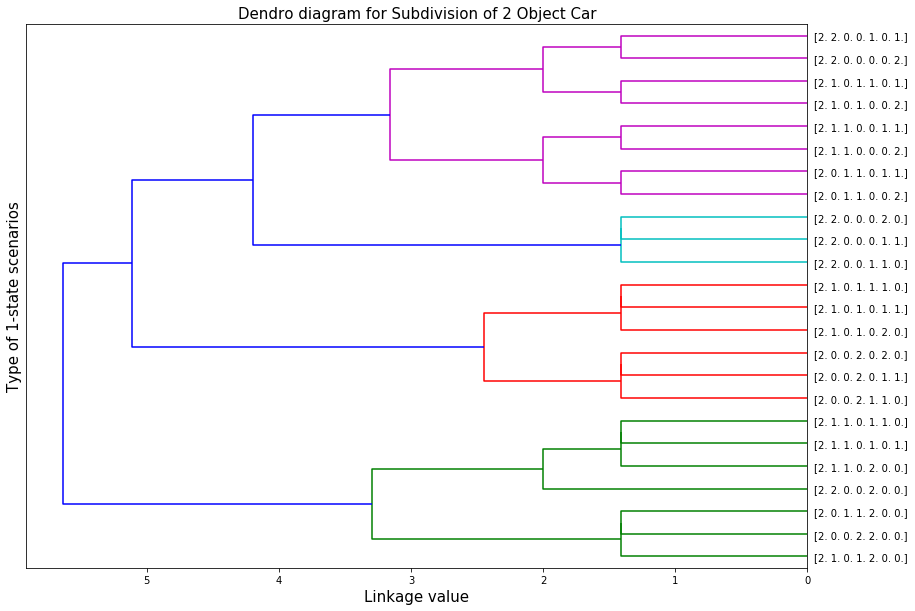

(23, 4)


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car2, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 2 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str2, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [42]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

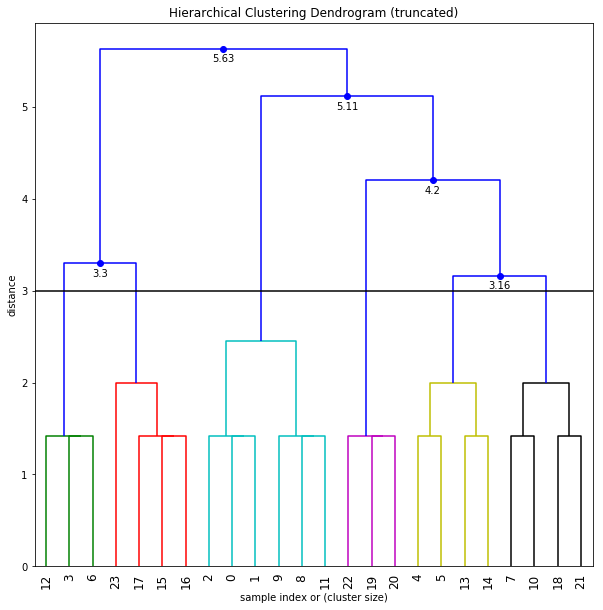

In [45]:
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=3,
)
plt.show()

In [12]:
Z

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 2.        , 24.        ,  1.41421356,  3.        ],
       [ 8.        , 11.        ,  1.41421356,  2.        ],
       [ 4.        ,  5.        ,  1.41421356,  2.        ],
       [ 9.        , 26.        ,  1.41421356,  3.        ],
       [19.        , 20.        ,  1.41421356,  2.        ],
       [ 7.        , 10.        ,  1.41421356,  2.        ],
       [13.        , 14.        ,  1.41421356,  2.        ],
       [15.        , 16.        ,  1.41421356,  2.        ],
       [22.        , 29.        ,  1.41421356,  3.        ],
       [ 3.        ,  6.        ,  1.41421356,  2.        ],
       [18.        , 21.        ,  1.41421356,  2.        ],
       [12.        , 34.        ,  1.41421356,  3.        ],
       [17.        , 32.        ,  1.41421356,  3.        ],
       [27.        , 31.        ,  2.        ,  4.        ],
       [30.        , 35.        ,  2.        ,  4.        ],
       [23.        , 37.

In [13]:
car3 = matrix_1st[np.where(matrix_1st[:,0]==3),:]
car3 = car3[:,1:]
car3 = np.squeeze(car3,axis= (0,))
str3 = ";".join(str(i) for i in car3)
str3 = str3.split(";")
str3

['[3. 0. 0. 3. 0. 1. 2.]',
 '[3. 0. 0. 3. 0. 2. 1.]',
 '[3. 0. 0. 3. 0. 3. 0.]',
 '[3. 0. 0. 3. 1. 2. 0.]',
 '[3. 0. 0. 3. 2. 1. 0.]',
 '[3. 0. 0. 3. 3. 0. 0.]',
 '[3. 0. 1. 2. 0. 0. 3.]',
 '[3. 0. 1. 2. 0. 1. 2.]',
 '[3. 0. 1. 2. 0. 2. 1.]',
 '[3. 0. 1. 2. 1. 2. 0.]',
 '[3. 0. 1. 2. 2. 1. 0.]',
 '[3. 0. 1. 2. 3. 0. 0.]',
 '[3. 1. 0. 2. 0. 0. 3.]',
 '[3. 1. 0. 2. 0. 1. 2.]',
 '[3. 1. 0. 2. 0. 2. 1.]',
 '[3. 1. 0. 2. 0. 3. 0.]',
 '[3. 1. 0. 2. 1. 1. 1.]',
 '[3. 1. 0. 2. 1. 2. 0.]',
 '[3. 1. 0. 2. 2. 0. 1.]',
 '[3. 1. 0. 2. 2. 1. 0.]',
 '[3. 1. 0. 2. 3. 0. 0.]',
 '[3. 1. 1. 1. 0. 0. 3.]',
 '[3. 1. 1. 1. 0. 1. 2.]',
 '[3. 1. 1. 1. 0. 2. 1.]',
 '[3. 1. 1. 1. 0. 3. 0.]',
 '[3. 1. 1. 1. 1. 1. 1.]',
 '[3. 1. 1. 1. 2. 1. 0.]',
 '[3. 1. 1. 1. 3. 0. 0.]',
 '[3. 2. 0. 1. 0. 0. 3.]',
 '[3. 2. 0. 1. 0. 1. 2.]',
 '[3. 2. 0. 1. 0. 2. 1.]',
 '[3. 2. 0. 1. 0. 3. 0.]',
 '[3. 2. 0. 1. 1. 2. 0.]',
 '[3. 2. 0. 1. 2. 1. 0.]',
 '[3. 2. 0. 1. 3. 0. 0.]',
 '[3. 2. 1. 0. 0. 0. 3.]',
 '[3. 2. 1. 0. 0. 1. 2.]',
 

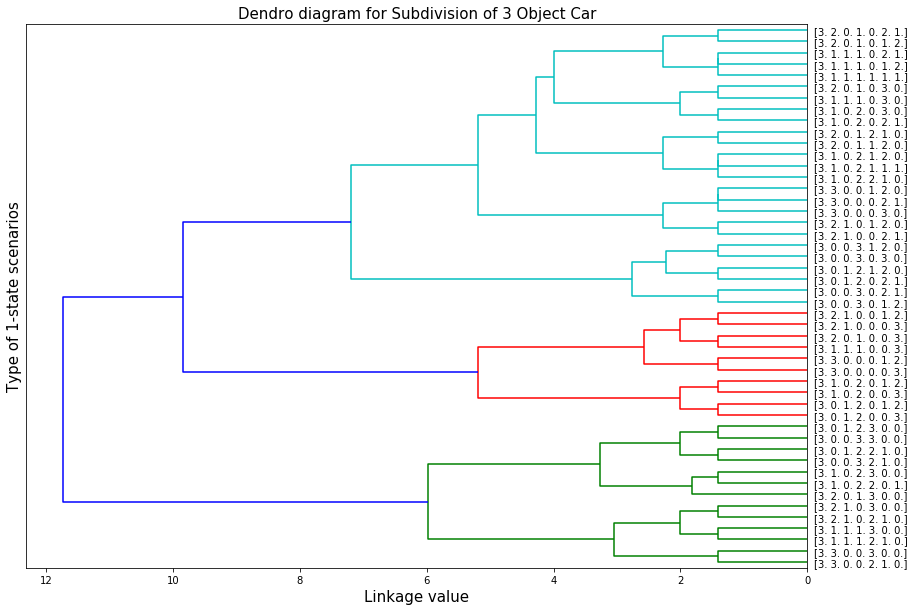

(47, 4)


In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car3, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 3 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str3, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [15]:
Z

array([[ 0.        ,  1.        ,  1.41421356,  2.        ],
       [ 6.        ,  7.        ,  1.41421356,  2.        ],
       [ 8.        ,  9.        ,  1.41421356,  2.        ],
       [12.        , 13.        ,  1.41421356,  2.        ],
       [14.        , 15.        ,  1.41421356,  2.        ],
       [ 2.        ,  3.        ,  1.41421356,  2.        ],
       [16.        , 17.        ,  1.41421356,  2.        ],
       [22.        , 23.        ,  1.41421356,  2.        ],
       [ 4.        , 10.        ,  1.41421356,  2.        ],
       [24.        , 31.        ,  1.41421356,  2.        ],
       [25.        , 55.        ,  1.41421356,  3.        ],
       [29.        , 30.        ,  1.41421356,  2.        ],
       [19.        , 54.        ,  1.41421356,  3.        ],
       [32.        , 33.        ,  1.41421356,  2.        ],
       [ 5.        , 11.        ,  1.41421356,  2.        ],
       [21.        , 28.        ,  1.41421356,  2.        ],
       [18.        , 20.

In [16]:
car4 = matrix_1st[np.where(matrix_1st[:,0]==4),:]
car4 = car4[:,1:]
car4 = np.squeeze(car4,axis= (0,))
str4 = ";".join(str(i) for i in car4)
str4 = str4.split(";")
str4

['[4. 0. 0. 4. 0. 1. 3.]',
 '[4. 0. 0. 4. 0. 2. 2.]',
 '[4. 0. 0. 4. 0. 3. 1.]',
 '[4. 0. 0. 4. 0. 4. 0.]',
 '[4. 0. 0. 4. 1. 3. 0.]',
 '[4. 0. 0. 4. 2. 2. 0.]',
 '[4. 0. 0. 4. 3. 1. 0.]',
 '[4. 0. 0. 4. 4. 0. 0.]',
 '[4. 0. 1. 3. 0. 0. 4.]',
 '[4. 0. 1. 3. 0. 1. 3.]',
 '[4. 0. 1. 3. 0. 2. 2.]',
 '[4. 0. 1. 3. 0. 3. 1.]',
 '[4. 0. 1. 3. 1. 3. 0.]',
 '[4. 0. 1. 3. 2. 2. 0.]',
 '[4. 0. 1. 3. 3. 1. 0.]',
 '[4. 0. 1. 3. 4. 0. 0.]',
 '[4. 1. 0. 3. 0. 0. 4.]',
 '[4. 1. 0. 3. 0. 1. 3.]',
 '[4. 1. 0. 3. 0. 2. 2.]',
 '[4. 1. 0. 3. 0. 3. 1.]',
 '[4. 1. 0. 3. 0. 4. 0.]',
 '[4. 1. 0. 3. 1. 3. 0.]',
 '[4. 1. 0. 3. 2. 2. 0.]',
 '[4. 1. 0. 3. 3. 1. 0.]',
 '[4. 1. 0. 3. 4. 0. 0.]',
 '[4. 1. 1. 2. 0. 0. 4.]',
 '[4. 1. 1. 2. 0. 1. 3.]',
 '[4. 1. 1. 2. 0. 2. 2.]',
 '[4. 1. 1. 2. 0. 3. 1.]',
 '[4. 1. 1. 2. 0. 4. 0.]',
 '[4. 1. 1. 2. 1. 3. 0.]',
 '[4. 1. 1. 2. 2. 2. 0.]',
 '[4. 1. 1. 2. 3. 0. 1.]',
 '[4. 1. 1. 2. 3. 1. 0.]',
 '[4. 1. 1. 2. 4. 0. 0.]',
 '[4. 2. 0. 2. 0. 0. 4.]',
 '[4. 2. 0. 2. 0. 1. 3.]',
 

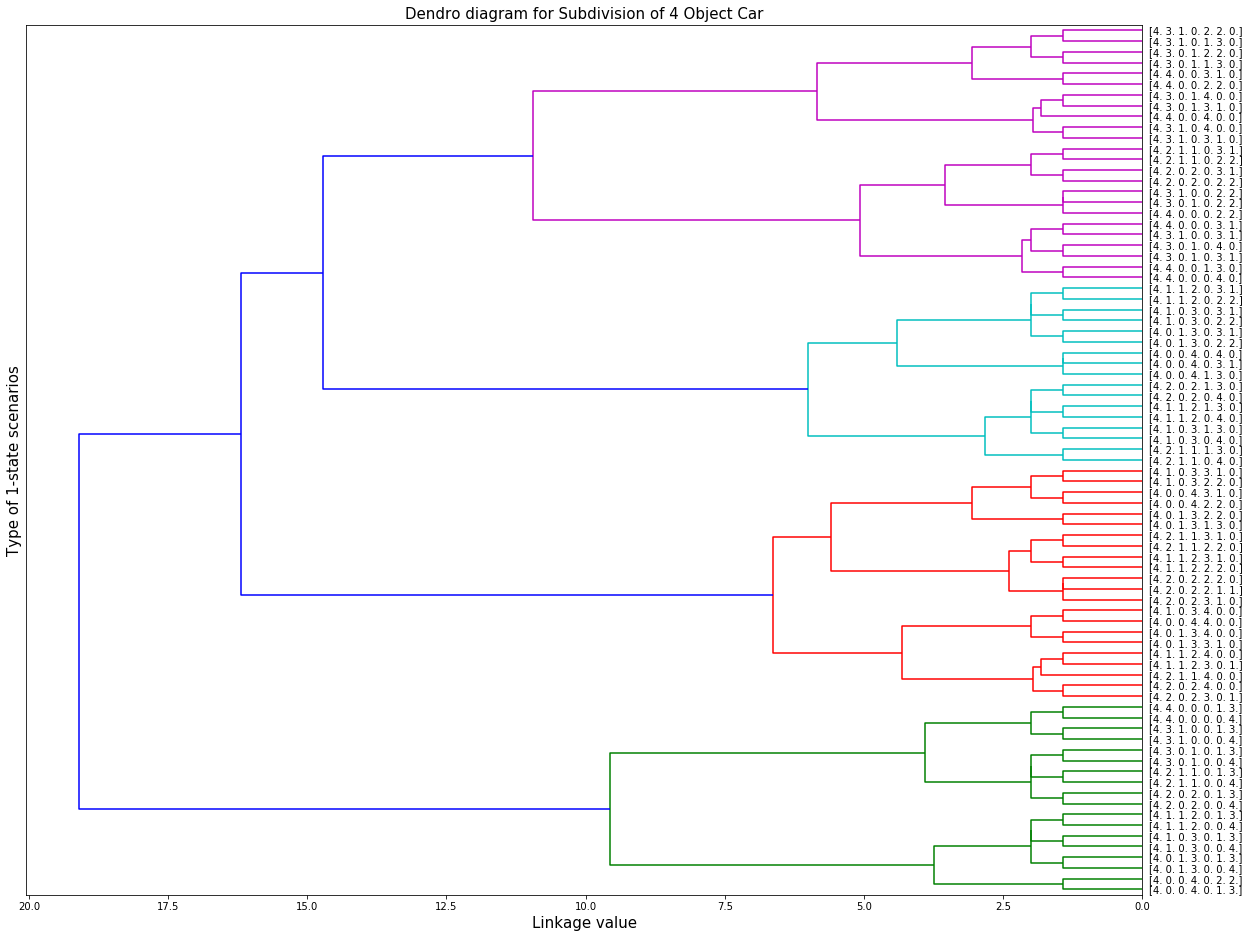

(80, 4)


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car4, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 16))
plt.title('Dendro diagram for Subdivision of 4 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str4, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [18]:
Z

array([[  0.        ,   1.        ,   1.41421356,   2.        ],
       [  8.        ,   9.        ,   1.41421356,   2.        ],
       [ 10.        ,  11.        ,   1.41421356,   2.        ],
       [ 16.        ,  17.        ,   1.41421356,   2.        ],
       [ 18.        ,  19.        ,   1.41421356,   2.        ],
       [  2.        ,   3.        ,   1.41421356,   2.        ],
       [ 25.        ,  26.        ,   1.41421356,   2.        ],
       [ 35.        ,  36.        ,   1.41421356,   2.        ],
       [ 27.        ,  28.        ,   1.41421356,   2.        ],
       [ 37.        ,  38.        ,   1.41421356,   2.        ],
       [ 46.        ,  47.        ,   1.41421356,   2.        ],
       [ 48.        ,  49.        ,   1.41421356,   2.        ],
       [  4.        ,  86.        ,   1.41421356,   3.        ],
       [  5.        ,   6.        ,   1.41421356,   2.        ],
       [ 55.        ,  56.        ,   1.41421356,   2.        ],
       [ 64.        ,  65

In [19]:
car5 = matrix_1st[np.where(matrix_1st[:,0]==5),:]
car5 = car5[:,1:]
car5 = np.squeeze(car5,axis= (0,))
str5 = ";".join(str(i) for i in car5)
str5 = str5.split(";")
str5

['[5. 0. 0. 5. 0. 1. 4.]',
 '[5. 0. 0. 5. 0. 2. 3.]',
 '[5. 0. 0. 5. 0. 3. 2.]',
 '[5. 0. 0. 5. 0. 4. 1.]',
 '[5. 0. 0. 5. 0. 5. 0.]',
 '[5. 0. 0. 5. 1. 4. 0.]',
 '[5. 0. 0. 5. 2. 3. 0.]',
 '[5. 0. 0. 5. 3. 2. 0.]',
 '[5. 0. 0. 5. 4. 1. 0.]',
 '[5. 0. 0. 5. 5. 0. 0.]',
 '[5. 0. 1. 4. 0. 0. 5.]',
 '[5. 0. 1. 4. 0. 1. 4.]',
 '[5. 0. 1. 4. 0. 2. 3.]',
 '[5. 0. 1. 4. 0. 3. 2.]',
 '[5. 0. 1. 4. 0. 4. 1.]',
 '[5. 0. 1. 4. 0. 5. 0.]',
 '[5. 0. 1. 4. 2. 3. 0.]',
 '[5. 0. 1. 4. 4. 1. 0.]',
 '[5. 0. 1. 4. 5. 0. 0.]',
 '[5. 1. 0. 4. 0. 0. 5.]',
 '[5. 1. 0. 4. 0. 1. 4.]',
 '[5. 1. 0. 4. 0. 2. 3.]',
 '[5. 1. 0. 4. 0. 3. 2.]',
 '[5. 1. 0. 4. 0. 4. 1.]',
 '[5. 1. 0. 4. 0. 5. 0.]',
 '[5. 1. 0. 4. 1. 4. 0.]',
 '[5. 1. 0. 4. 2. 2. 1.]',
 '[5. 1. 0. 4. 2. 3. 0.]',
 '[5. 1. 0. 4. 3. 2. 0.]',
 '[5. 1. 0. 4. 4. 1. 0.]',
 '[5. 1. 0. 4. 5. 0. 0.]',
 '[5. 1. 1. 3. 0. 1. 4.]',
 '[5. 1. 1. 3. 0. 2. 3.]',
 '[5. 1. 1. 3. 0. 3. 2.]',
 '[5. 1. 1. 3. 0. 4. 1.]',
 '[5. 1. 1. 3. 0. 5. 0.]',
 '[5. 1. 1. 3. 1. 4. 0.]',
 

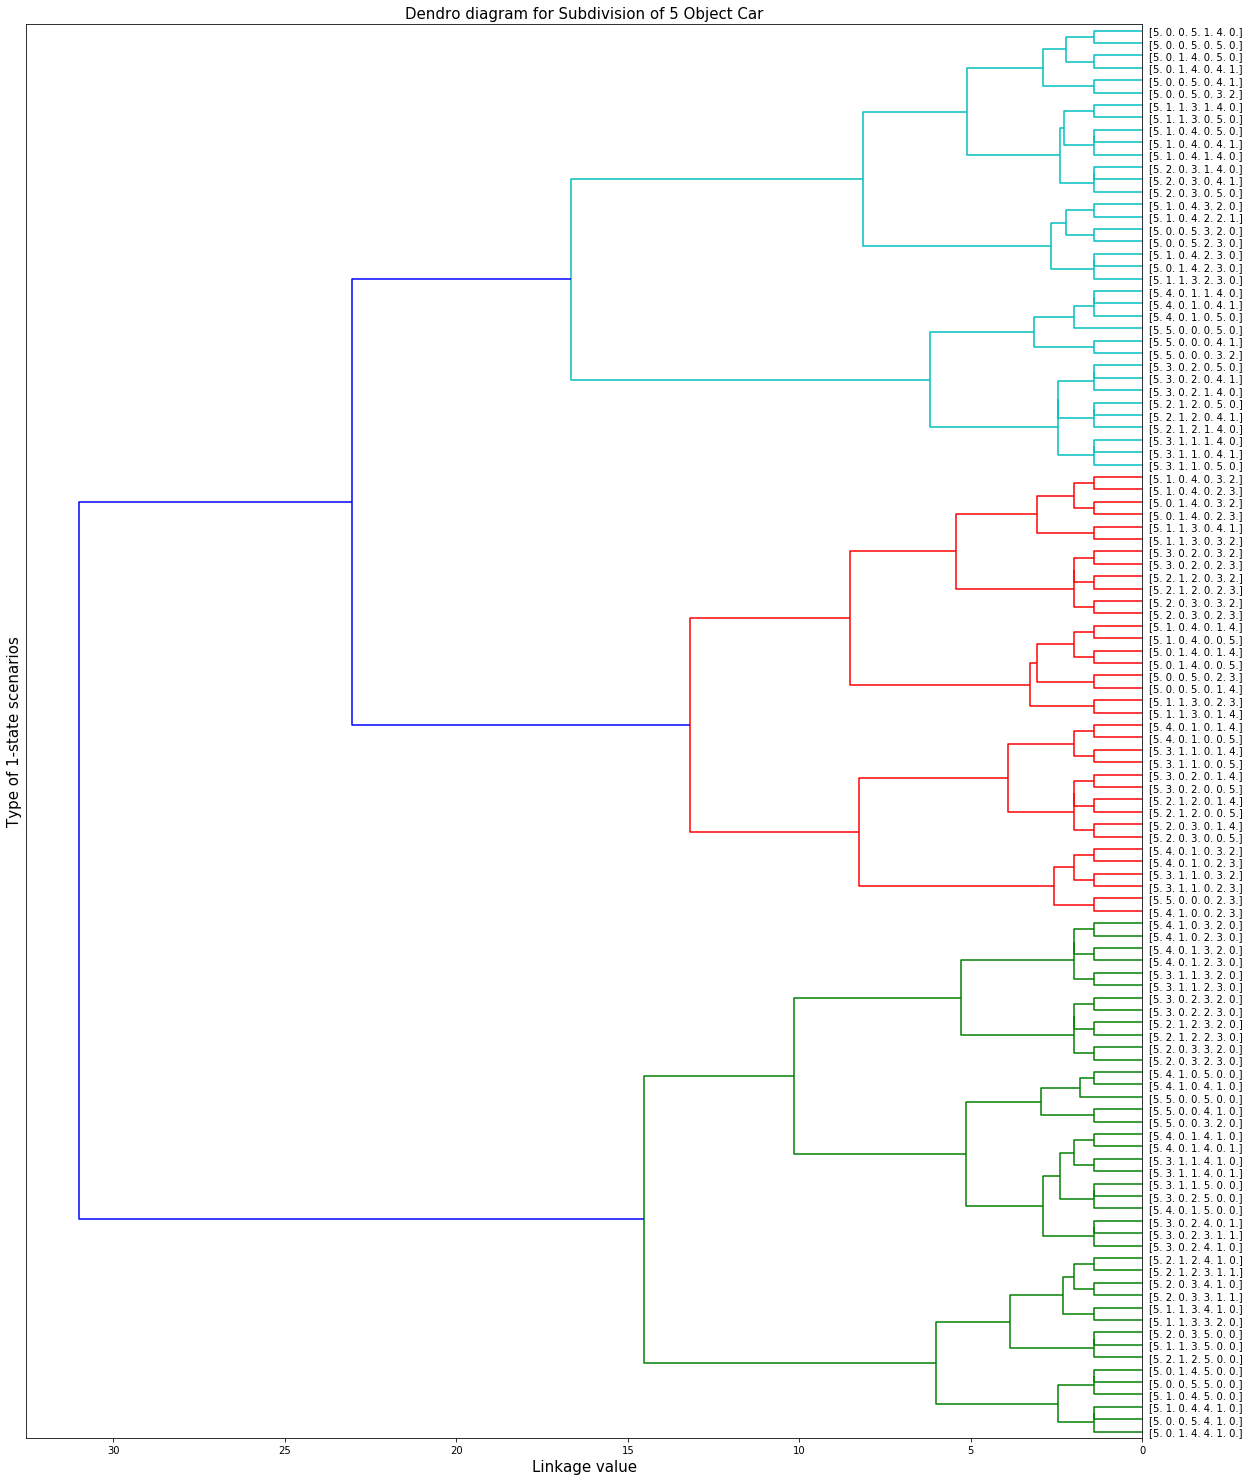

(113, 4)


In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car5, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 26))
plt.title('Dendro diagram for Subdivision of 5 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str5, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [21]:
Z

array([[  0.        ,   1.        ,   1.41421356,   2.        ],
       [ 10.        ,  11.        ,   1.41421356,   2.        ],
       [ 12.        ,  13.        ,   1.41421356,   2.        ],
       [ 19.        ,  20.        ,   1.41421356,   2.        ],
       [ 21.        ,  22.        ,   1.41421356,   2.        ],
       [  2.        ,   3.        ,   1.41421356,   2.        ],
       [ 31.        ,  32.        ,   1.41421356,   2.        ],
       [ 41.        ,  42.        ,   1.41421356,   2.        ],
       [ 33.        ,  34.        ,   1.41421356,   2.        ],
       [ 43.        ,  44.        ,   1.41421356,   2.        ],
       [ 53.        ,  54.        ,   1.41421356,   2.        ],
       [ 65.        ,  66.        ,   1.41421356,   2.        ],
       [ 78.        ,  79.        ,   1.41421356,   2.        ],
       [ 14.        ,  15.        ,   1.41421356,   2.        ],
       [ 23.        ,  24.        ,   1.41421356,   2.        ],
       [  4.        ,   5

In [22]:
car6 = matrix_1st[np.where(matrix_1st[:,0]==6),:]
car6 = car6[:,1:]
car6 = np.squeeze(car6,axis= (0,))
str6 = ";".join(str(i) for i in car6)
str6 = str6.split(";")
str6

['[6. 0. 0. 6. 0. 2. 4.]',
 '[6. 0. 0. 6. 0. 3. 3.]',
 '[6. 0. 0. 6. 0. 4. 2.]',
 '[6. 0. 0. 6. 0. 5. 1.]',
 '[6. 0. 0. 6. 0. 6. 0.]',
 '[6. 0. 0. 6. 1. 5. 0.]',
 '[6. 0. 0. 6. 2. 4. 0.]',
 '[6. 0. 0. 6. 3. 3. 0.]',
 '[6. 0. 0. 6. 4. 2. 0.]',
 '[6. 0. 0. 6. 5. 1. 0.]',
 '[6. 0. 0. 6. 6. 0. 0.]',
 '[6. 0. 1. 5. 0. 1. 5.]',
 '[6. 0. 1. 5. 0. 2. 4.]',
 '[6. 0. 1. 5. 0. 3. 3.]',
 '[6. 0. 1. 5. 0. 4. 2.]',
 '[6. 0. 1. 5. 0. 5. 1.]',
 '[6. 0. 1. 5. 0. 6. 0.]',
 '[6. 0. 1. 5. 2. 4. 0.]',
 '[6. 0. 1. 5. 3. 3. 0.]',
 '[6. 1. 0. 5. 0. 0. 6.]',
 '[6. 1. 0. 5. 0. 1. 5.]',
 '[6. 1. 0. 5. 0. 2. 4.]',
 '[6. 1. 0. 5. 0. 3. 3.]',
 '[6. 1. 0. 5. 0. 4. 2.]',
 '[6. 1. 0. 5. 0. 5. 1.]',
 '[6. 1. 0. 5. 0. 6. 0.]',
 '[6. 1. 0. 5. 1. 5. 0.]',
 '[6. 1. 0. 5. 2. 4. 0.]',
 '[6. 1. 0. 5. 3. 3. 0.]',
 '[6. 1. 0. 5. 4. 2. 0.]',
 '[6. 1. 0. 5. 5. 1. 0.]',
 '[6. 1. 0. 5. 6. 0. 0.]',
 '[6. 1. 1. 4. 0. 0. 6.]',
 '[6. 1. 1. 4. 0. 1. 5.]',
 '[6. 1. 1. 4. 0. 2. 4.]',
 '[6. 1. 1. 4. 0. 3. 3.]',
 '[6. 1. 1. 4. 0. 4. 2.]',
 

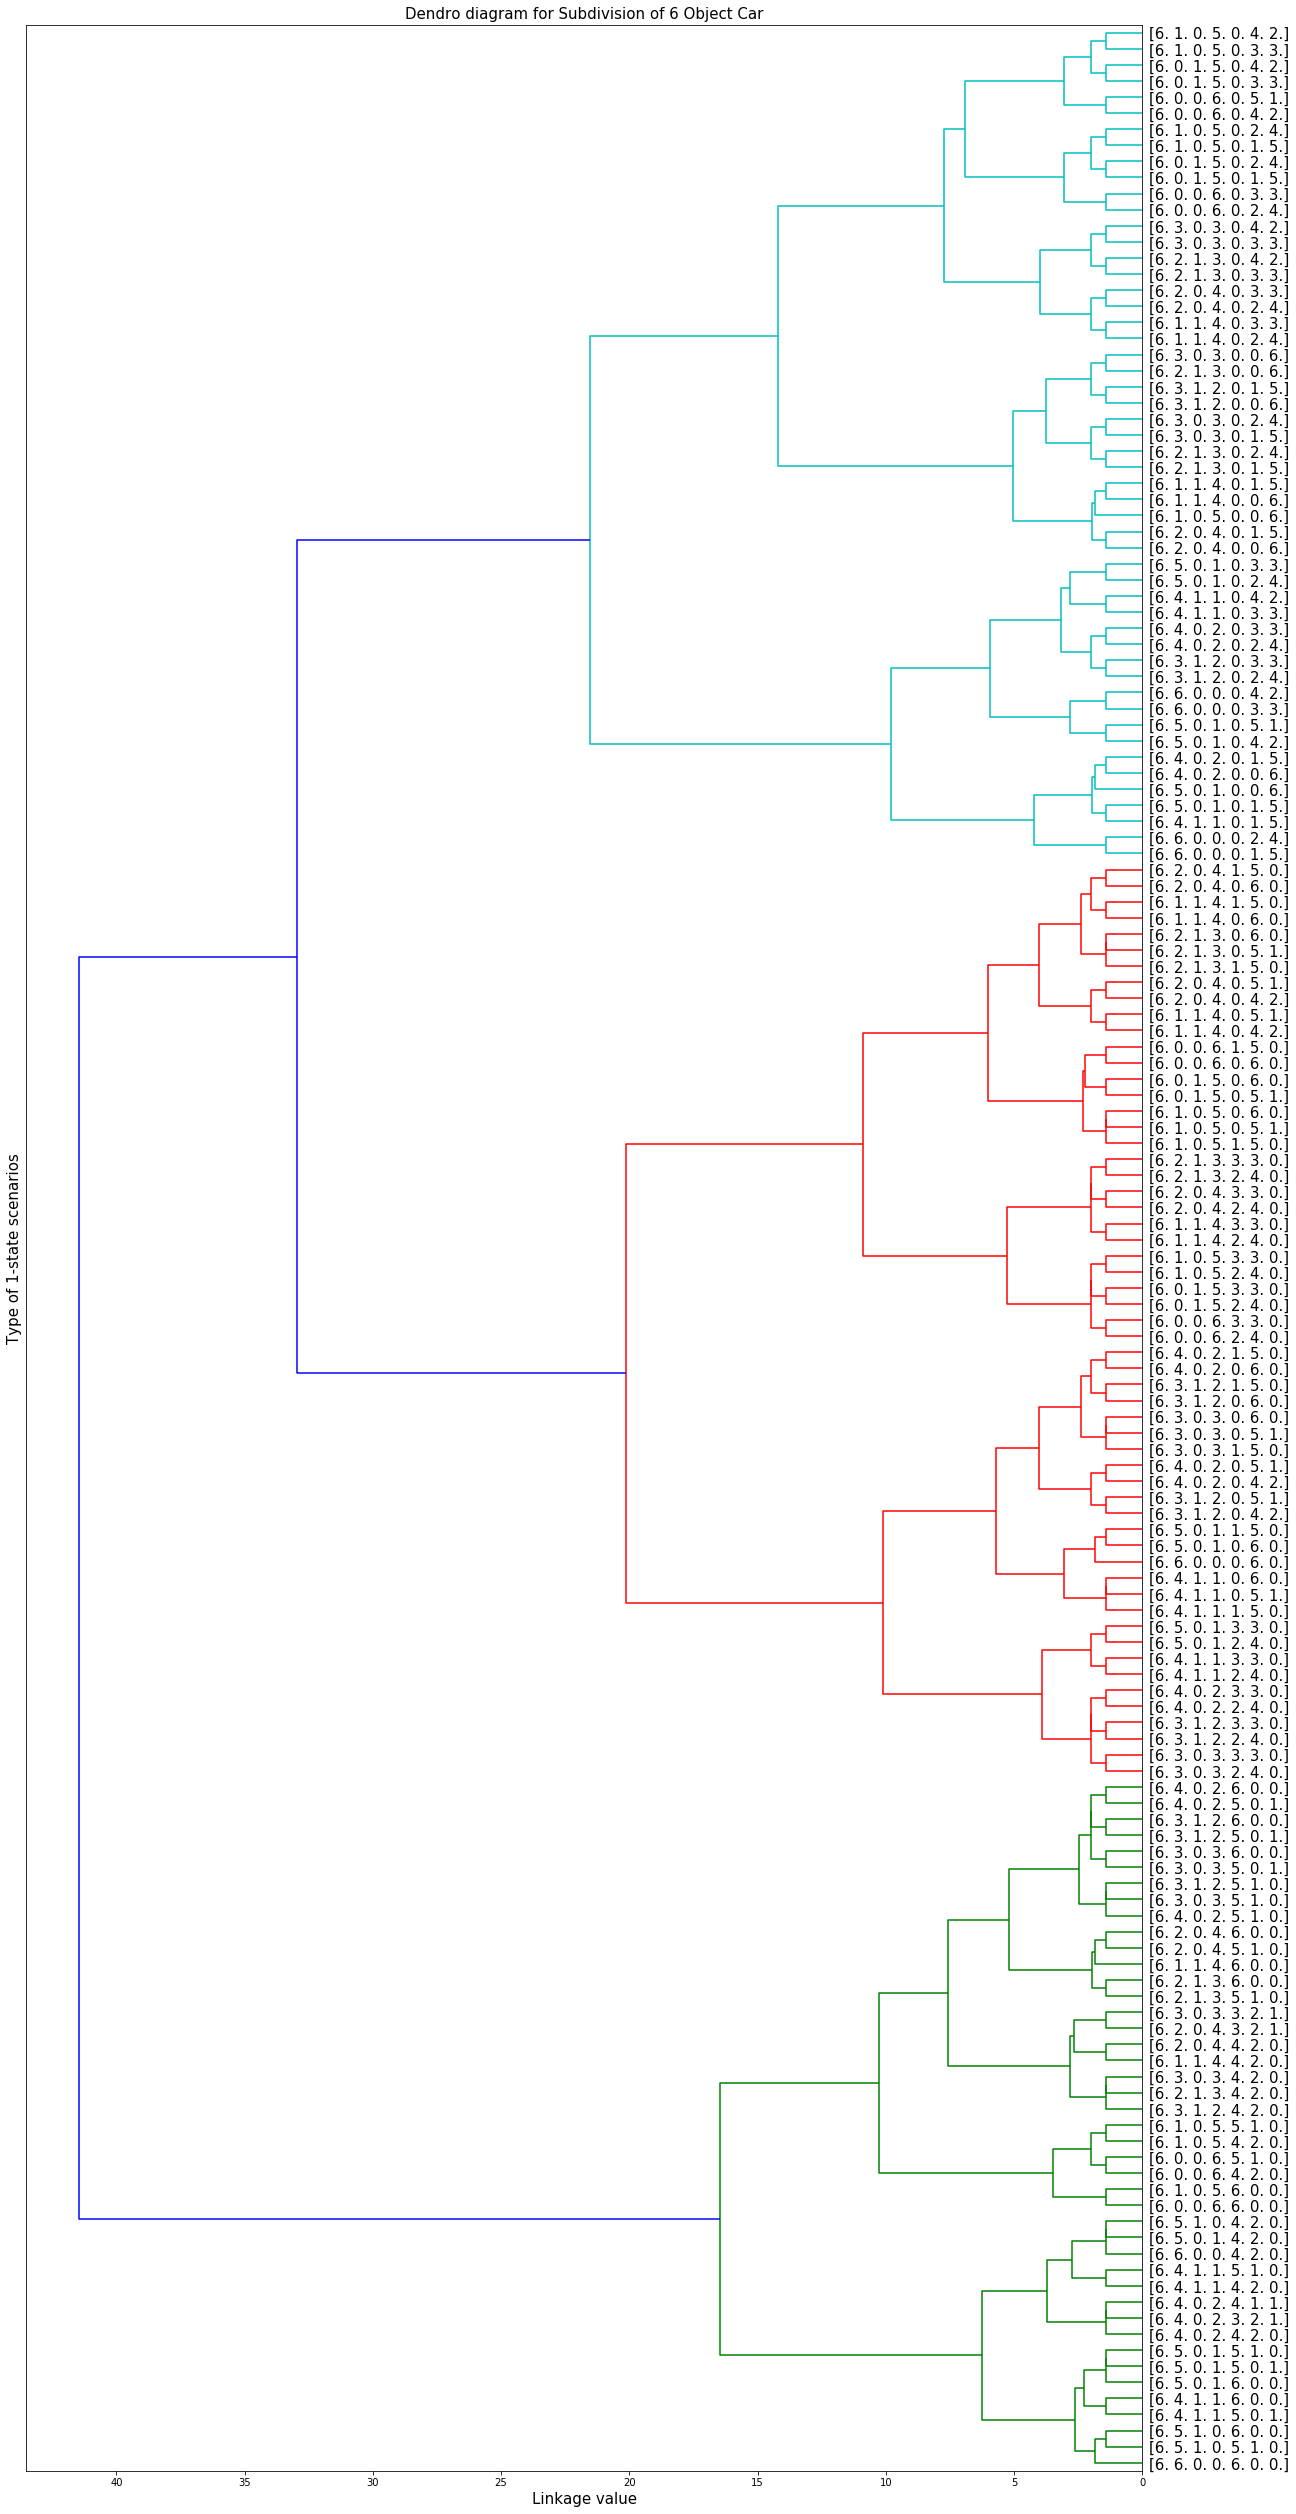

(151, 4)


In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car6, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 45))
plt.title('Dendro diagram for Subdivision of 6 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str6,orientation='left', leaf_rotation=0,
              leaf_font_size=15)

plt.show()
print(Z.shape)

In [24]:
Z

array([[  0.        ,   1.        ,   1.41421356,   2.        ],
       [ 11.        ,  12.        ,   1.41421356,   2.        ],
       [ 13.        ,  14.        ,   1.41421356,   2.        ],
       [ 20.        ,  21.        ,   1.41421356,   2.        ],
       [ 22.        ,  23.        ,   1.41421356,   2.        ],
       [  2.        ,   3.        ,   1.41421356,   2.        ],
       [ 32.        ,  33.        ,   1.41421356,   2.        ],
       [ 34.        ,  35.        ,   1.41421356,   2.        ],
       [ 44.        ,  45.        ,   1.41421356,   2.        ],
       [ 46.        ,  47.        ,   1.41421356,   2.        ],
       [ 36.        ,  37.        ,   1.41421356,   2.        ],
       [ 48.        ,  49.        ,   1.41421356,   2.        ],
       [ 15.        ,  16.        ,   1.41421356,   2.        ],
       [ 24.        ,  25.        ,   1.41421356,   2.        ],
       [  4.        ,   5.        ,   1.41421356,   2.        ],
       [ 26.        , 165

In [25]:
car7 = matrix_1st[np.where(matrix_1st[:,0]==7),:]
car7 = car7[:,1:]
car7 = np.squeeze(car7, axis= (0,))
str7 = ";".join(str(i) for i in car7)
str7 = str7.split(";")
str7

['[7. 0. 0. 7. 0. 2. 5.]',
 '[7. 0. 0. 7. 0. 3. 4.]',
 '[7. 0. 0. 7. 0. 4. 3.]',
 '[7. 0. 0. 7. 0. 5. 2.]',
 '[7. 0. 0. 7. 0. 6. 1.]',
 '[7. 0. 0. 7. 0. 7. 0.]',
 '[7. 0. 0. 7. 2. 5. 0.]',
 '[7. 0. 0. 7. 3. 4. 0.]',
 '[7. 0. 0. 7. 4. 3. 0.]',
 '[7. 0. 0. 7. 5. 2. 0.]',
 '[7. 0. 0. 7. 6. 1. 0.]',
 '[7. 0. 0. 7. 7. 0. 0.]',
 '[7. 0. 1. 6. 0. 3. 4.]',
 '[7. 0. 1. 6. 0. 4. 3.]',
 '[7. 0. 1. 6. 0. 5. 2.]',
 '[7. 0. 1. 6. 0. 6. 1.]',
 '[7. 0. 1. 6. 2. 5. 0.]',
 '[7. 0. 1. 6. 3. 4. 0.]',
 '[7. 1. 0. 6. 0. 1. 6.]',
 '[7. 1. 0. 6. 0. 2. 5.]',
 '[7. 1. 0. 6. 0. 3. 4.]',
 '[7. 1. 0. 6. 0. 4. 3.]',
 '[7. 1. 0. 6. 0. 5. 2.]',
 '[7. 1. 0. 6. 0. 6. 1.]',
 '[7. 1. 0. 6. 0. 7. 0.]',
 '[7. 1. 0. 6. 1. 6. 0.]',
 '[7. 1. 0. 6. 2. 5. 0.]',
 '[7. 1. 0. 6. 3. 4. 0.]',
 '[7. 1. 0. 6. 4. 3. 0.]',
 '[7. 1. 0. 6. 6. 1. 0.]',
 '[7. 1. 1. 5. 0. 1. 6.]',
 '[7. 1. 1. 5. 0. 2. 5.]',
 '[7. 1. 1. 5. 0. 3. 4.]',
 '[7. 1. 1. 5. 0. 4. 3.]',
 '[7. 1. 1. 5. 0. 5. 2.]',
 '[7. 1. 1. 5. 0. 6. 1.]',
 '[7. 1. 1. 5. 2. 5. 0.]',
 

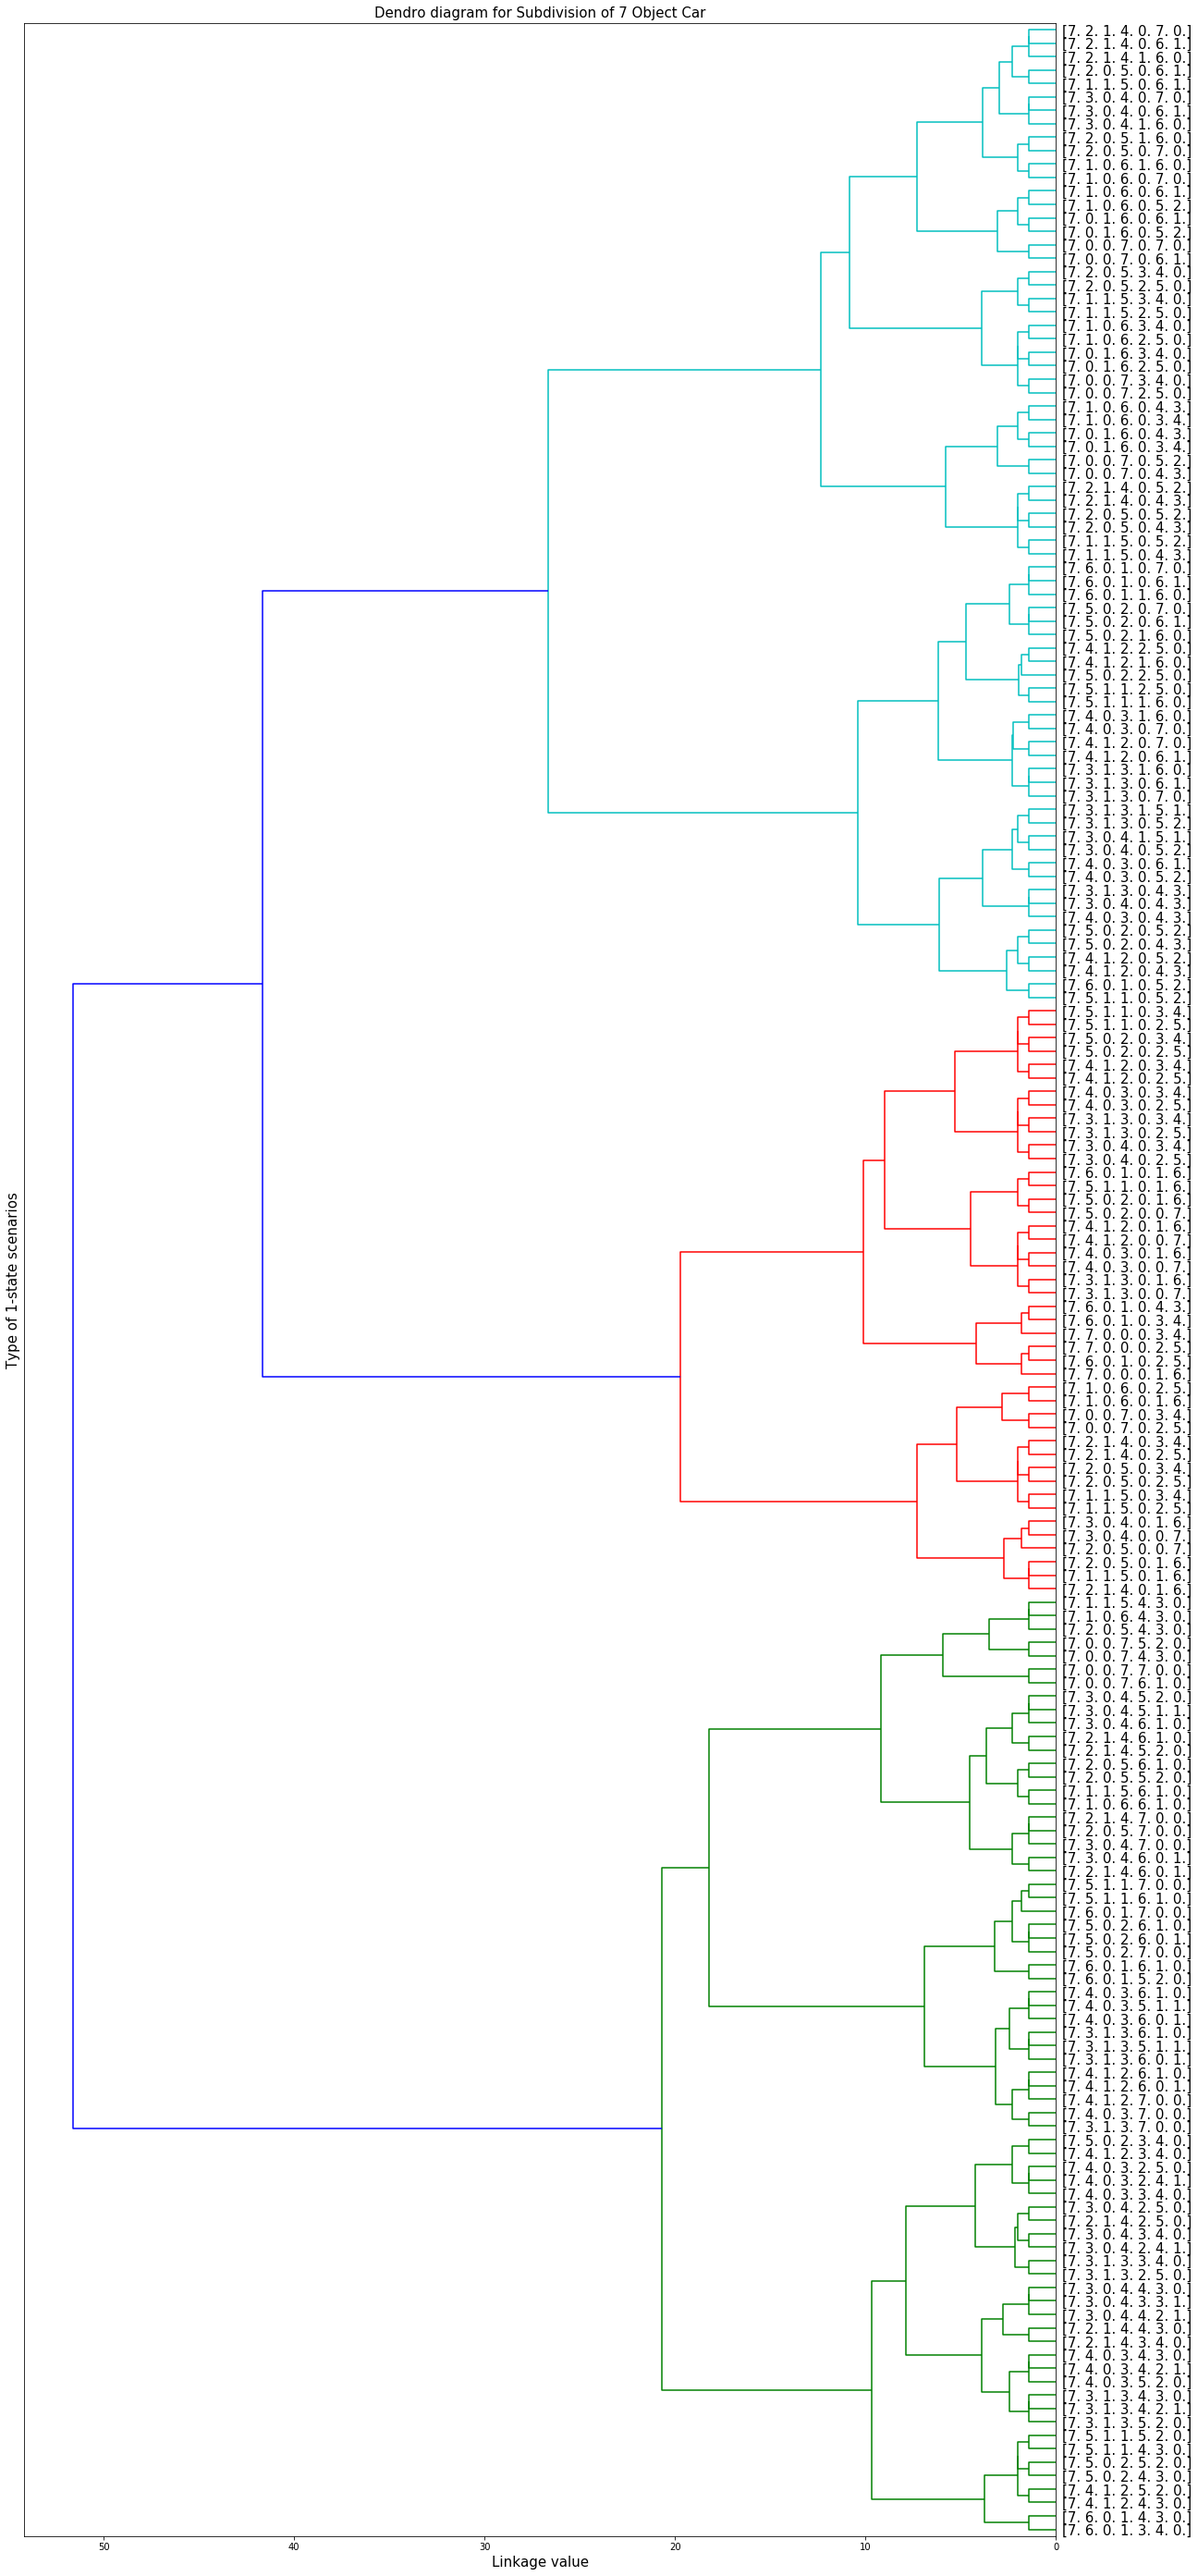

(186, 4)


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car7, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 7 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str7, leaf_rotation=0,orientation= 'left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [43]:
car8 = matrix_1st[np.where(matrix_1st[:,0]==8),:]
car8 = car8[:,1:]
car8 = np.squeeze(car8,axis= (0,))
str8 = ";".join(str(i) for i in car8)
str8 = str8.split(";")
str8

['[8. 0. 0. 8. 0. 2. 6.]',
 '[8. 0. 0. 8. 0. 3. 5.]',
 '[8. 0. 0. 8. 0. 4. 4.]',
 '[8. 0. 0. 8. 0. 5. 3.]',
 '[8. 0. 0. 8. 0. 6. 2.]',
 '[8. 0. 0. 8. 0. 7. 1.]',
 '[8. 0. 0. 8. 0. 8. 0.]',
 '[8. 0. 0. 8. 2. 6. 0.]',
 '[8. 0. 0. 8. 7. 1. 0.]',
 '[8. 0. 1. 7. 0. 4. 4.]',
 '[8. 0. 1. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 1. 7.]',
 '[8. 1. 0. 7. 0. 2. 6.]',
 '[8. 1. 0. 7. 0. 3. 5.]',
 '[8. 1. 0. 7. 0. 4. 4.]',
 '[8. 1. 0. 7. 0. 5. 3.]',
 '[8. 1. 0. 7. 0. 6. 2.]',
 '[8. 1. 0. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 8. 0.]',
 '[8. 1. 0. 7. 2. 6. 0.]',
 '[8. 1. 0. 7. 3. 5. 0.]',
 '[8. 1. 1. 6. 0. 3. 5.]',
 '[8. 1. 1. 6. 0. 4. 4.]',
 '[8. 1. 1. 6. 0. 5. 3.]',
 '[8. 1. 1. 6. 0. 6. 2.]',
 '[8. 1. 1. 6. 0. 7. 1.]',
 '[8. 1. 1. 6. 2. 6. 0.]',
 '[8. 1. 1. 6. 3. 5. 0.]',
 '[8. 1. 1. 6. 4. 4. 0.]',
 '[8. 1. 1. 6. 5. 3. 0.]',
 '[8. 1. 1. 6. 6. 2. 0.]',
 '[8. 2. 0. 6. 0. 0. 8.]',
 '[8. 2. 0. 6. 0. 1. 7.]',
 '[8. 2. 0. 6. 0. 2. 6.]',
 '[8. 2. 0. 6. 0. 3. 5.]',
 '[8. 2. 0. 6. 0. 4. 4.]',
 '[8. 2. 0. 6. 0. 5. 3.]',
 

In [27]:
Z

array([[  0.        ,   1.        ,   1.41421356,   2.        ],
       [ 12.        ,  13.        ,   1.41421356,   2.        ],
       [ 18.        ,  19.        ,   1.41421356,   2.        ],
       [ 20.        ,  21.        ,   1.41421356,   2.        ],
       [  2.        ,   3.        ,   1.41421356,   2.        ],
       [ 31.        ,  32.        ,   1.41421356,   2.        ],
       [ 33.        ,  34.        ,   1.41421356,   2.        ],
       [ 42.        ,  43.        ,   1.41421356,   2.        ],
       [ 44.        ,  45.        ,   1.41421356,   2.        ],
       [ 30.        ,  41.        ,   1.41421356,   2.        ],
       [ 55.        , 196.        ,   1.41421356,   3.        ],
       [ 56.        ,  57.        ,   1.41421356,   2.        ],
       [ 70.        ,  71.        ,   1.41421356,   2.        ],
       [ 91.        ,  92.        ,   1.41421356,   2.        ],
       [ 72.        ,  73.        ,   1.41421356,   2.        ],
       [110.        , 111

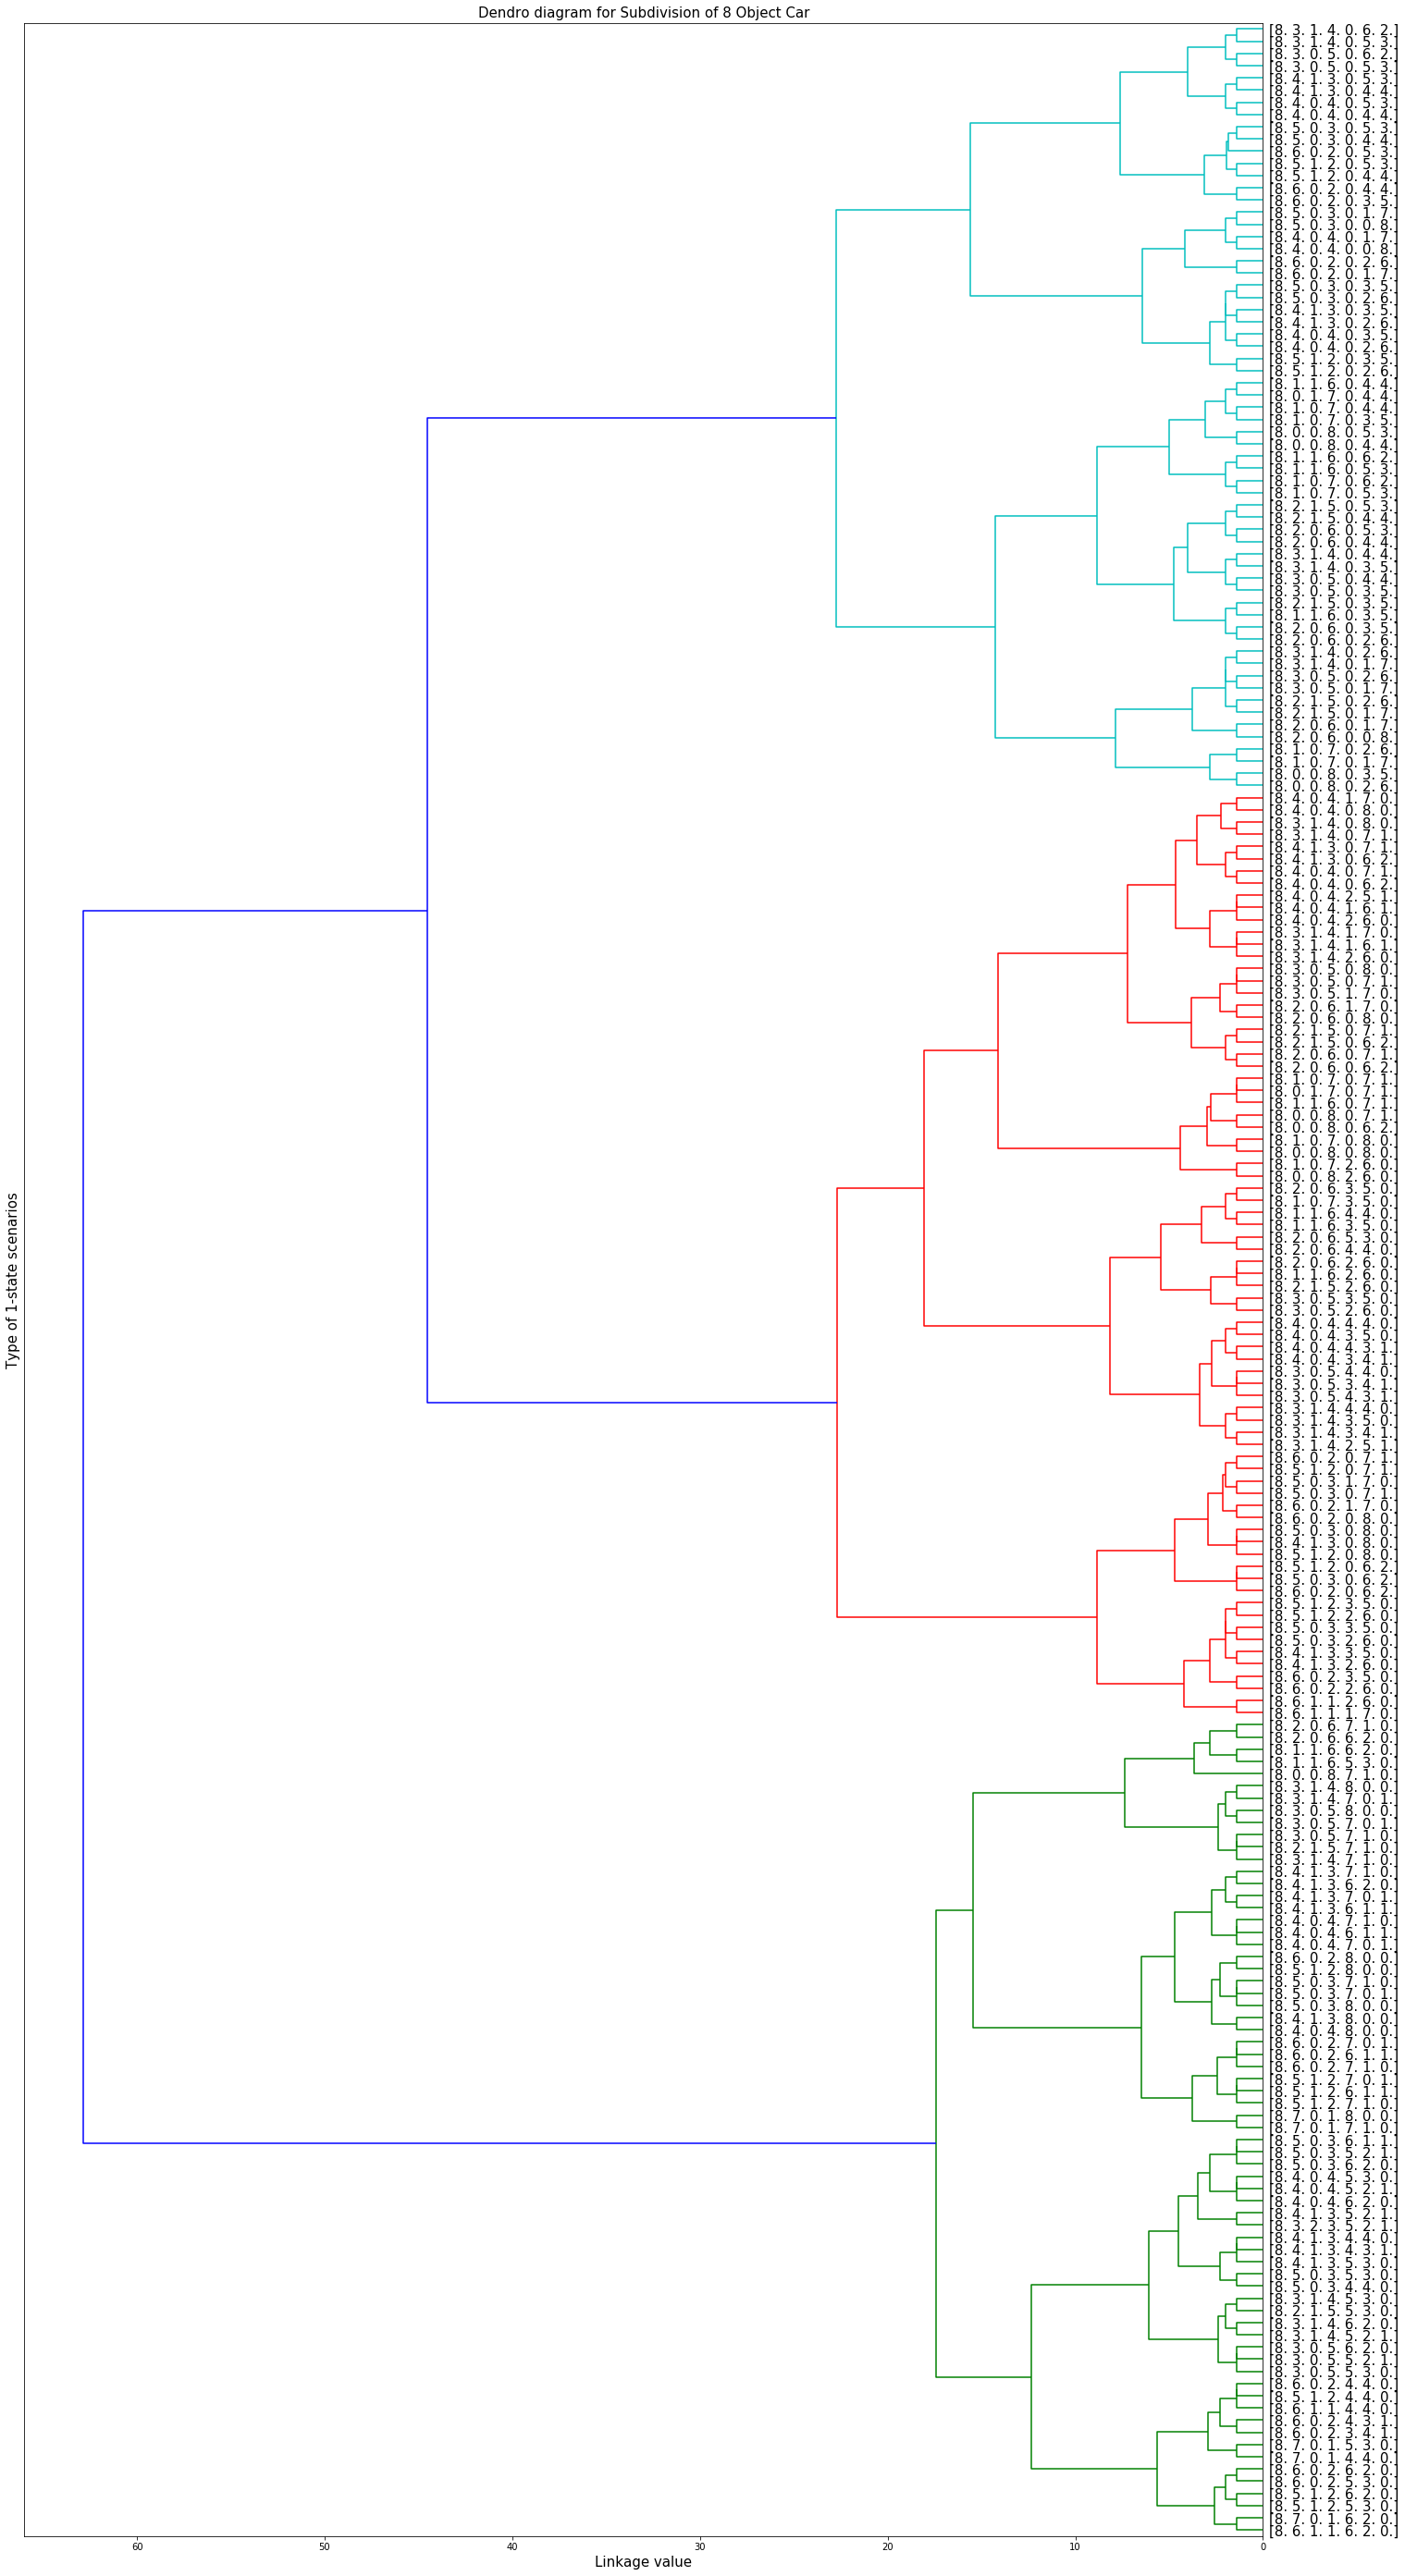

(205, 4)


In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car8, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(24, 50))
plt.title('Dendro diagram for Subdivision of 8 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str8, leaf_rotation=0,orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [45]:
car9 = matrix_1st[np.where(matrix_1st[:,0]==9),:]
car9 = car9[:,1:]
car9 = np.squeeze(car9,axis= (0,))
str9 = ";".join(str(i) for i in car9)
str9 = str9.split(";")
str9

['[9. 0. 0. 9. 0. 2. 7.]',
 '[9. 0. 0. 9. 0. 3. 6.]',
 '[9. 0. 0. 9. 0. 4. 5.]',
 '[9. 0. 0. 9. 0. 5. 4.]',
 '[9. 0. 0. 9. 0. 6. 3.]',
 '[9. 0. 0. 9. 0. 7. 2.]',
 '[9. 0. 0. 9. 0. 8. 1.]',
 '[9. 0. 0. 9. 0. 9. 0.]',
 '[9. 0. 0. 9. 8. 1. 0.]',
 '[9. 1. 0. 8. 0. 4. 5.]',
 '[9. 1. 0. 8. 0. 5. 4.]',
 '[9. 1. 0. 8. 0. 6. 3.]',
 '[9. 1. 0. 8. 0. 7. 2.]',
 '[9. 1. 0. 8. 0. 8. 1.]',
 '[9. 1. 0. 8. 0. 9. 0.]',
 '[9. 1. 0. 8. 2. 7. 0.]',
 '[9. 1. 1. 7. 0. 5. 4.]',
 '[9. 1. 1. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 2. 7.]',
 '[9. 2. 0. 7. 0. 3. 6.]',
 '[9. 2. 0. 7. 0. 4. 5.]',
 '[9. 2. 0. 7. 0. 5. 4.]',
 '[9. 2. 0. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 7. 2.]',
 '[9. 2. 0. 7. 0. 8. 1.]',
 '[9. 2. 0. 7. 0. 9. 0.]',
 '[9. 2. 0. 7. 2. 7. 0.]',
 '[9. 2. 0. 7. 4. 5. 0.]',
 '[9. 2. 0. 7. 5. 4. 0.]',
 '[9. 2. 1. 6. 0. 2. 7.]',
 '[9. 2. 1. 6. 0. 4. 5.]',
 '[9. 2. 1. 6. 0. 5. 4.]',
 '[9. 2. 1. 6. 0. 6. 3.]',
 '[9. 2. 1. 6. 0. 7. 2.]',
 '[9. 2. 1. 6. 0. 8. 1.]',
 '[9. 2. 1. 6. 0. 9. 0.]',
 '[9. 2. 1. 6. 5. 4. 0.]',
 

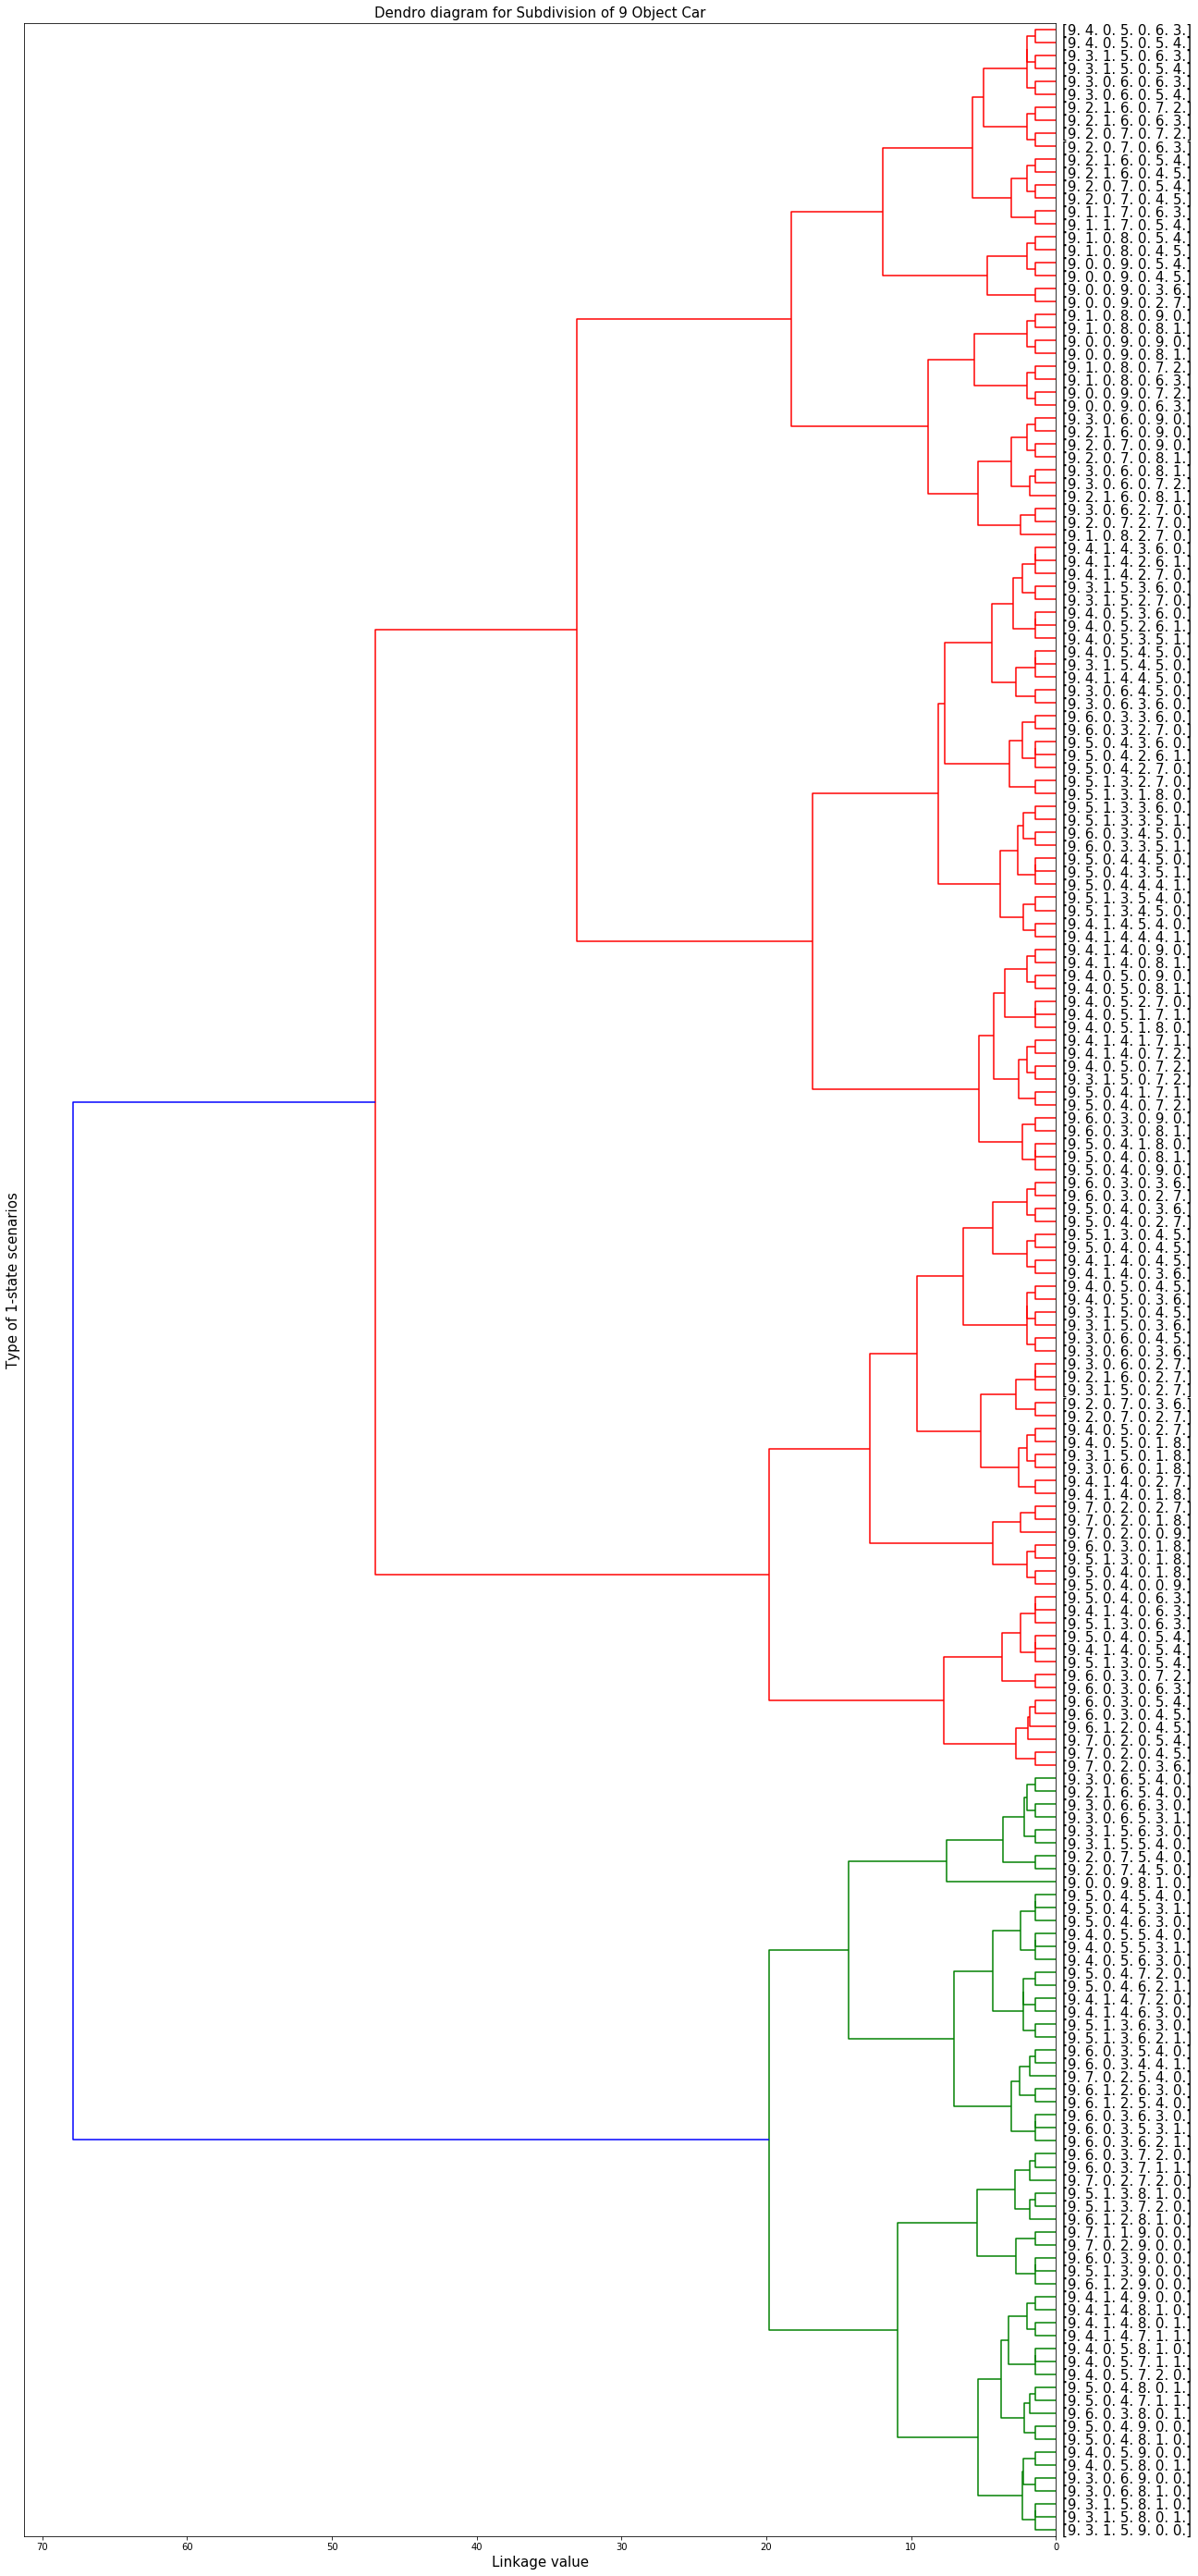

(193, 4)


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car9, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 9 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str9, orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)